In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

warnings.filterwarnings("ignore")

df = pd.read_csv("./income_cleaned.csv")

In [211]:
df.shape

(32537, 15)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  fiftyplus       32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [213]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [214]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
fiftyplus         0
dtype: int64

In [215]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education-num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital-gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital-loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


In [216]:
df['age'].dtype

dtype('int64')

In [217]:
#fetching categorical/string columns only...
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']
# fetching numeric columns list
numeric_features = [feature for feature in df.columns if df[feature].dtype =='int64'] 

In [218]:
categorical_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'fiftyplus']

In [219]:
numeric_features

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

<Figure size 1000x1000 with 0 Axes>

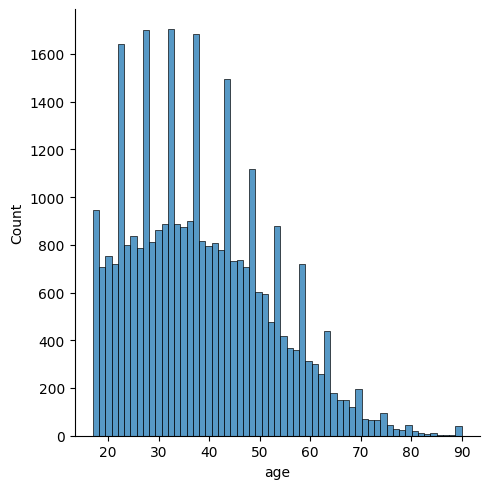

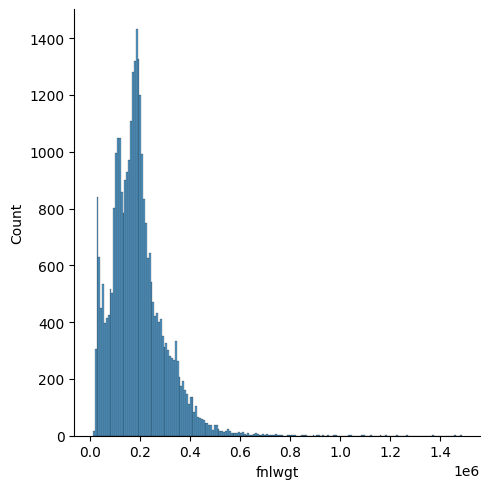

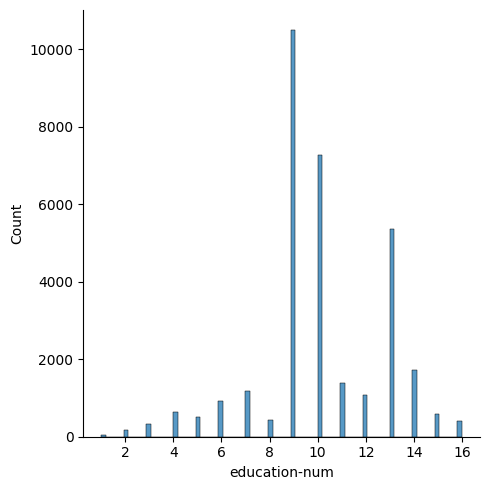

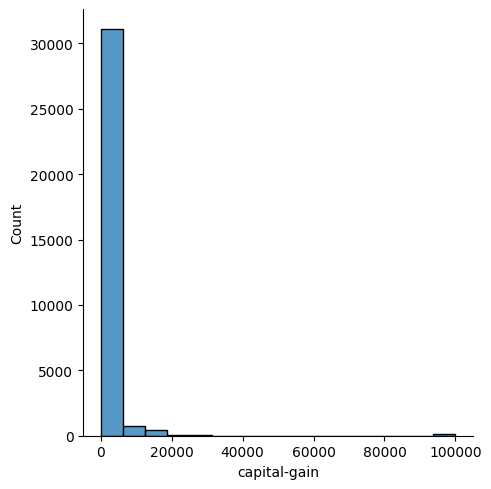

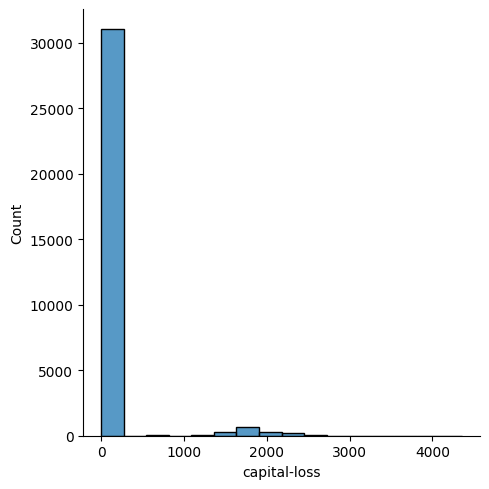

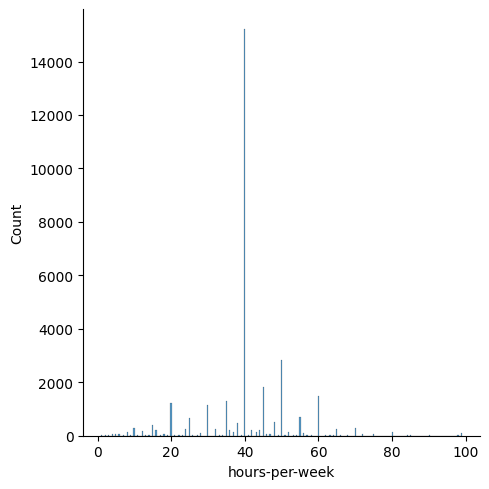

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x=0

for i in numeric_features:
    sns.displot(df[i])
    print('\n')
    plt.show()
    

In [221]:
df['fiftyplus'].value_counts(normalize=True) * 100 # getting how many percentage values in type columns....

fiftyplus
<=50K    75.907428
>50K     24.092572
Name: proportion, dtype: float64

[Text(0, 0, '24698'), Text(0, 0, '7839')]

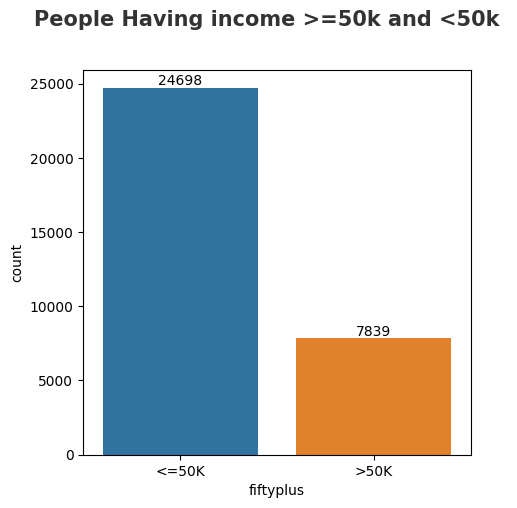

In [222]:
#number of people with income ratio
plt.figure(figsize=(5, 5))
plt.suptitle('People Having income >=50k and <50k ', fontsize=15, fontweight='bold', alpha=0.8, y=1.)
gr = sns.countplot(x = df['fiftyplus'])

abs_values = df['fiftyplus'].value_counts(ascending=False).values

gr.bar_label(container=gr.containers[0], labels=abs_values)


[Text(0, 0, '21775'), Text(0, 0, '10762')]

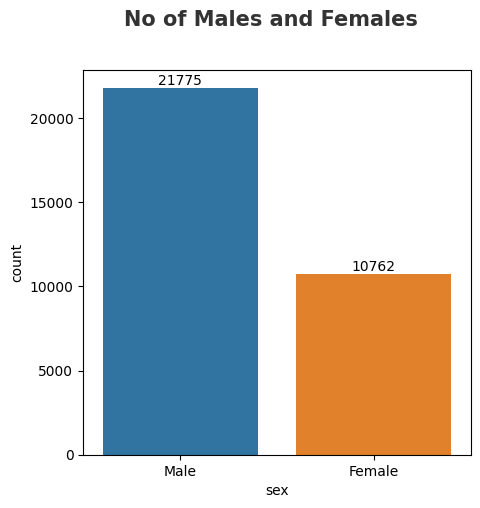

In [223]:
#number of people with income ratio
plt.figure(figsize=(5, 5))
plt.suptitle('No of Males and Females', fontsize=15, fontweight='bold', alpha=0.8, y=1.)
gr = sns.countplot(x = df['sex'])
abs_values = df['sex'].value_counts(ascending=False).values
gr.bar_label(container=gr.containers[0], labels=abs_values)

[Text(0, 0, '22673'),
 Text(0, 0, '2540'),
 Text(0, 0, '2093'),
 Text(0, 0, '1836'),
 Text(0, 0, '1298'),
 Text(0, 0, '1116'),
 Text(0, 0, '960'),
 Text(0, 0, '14'),
 Text(0, 0, '7')]

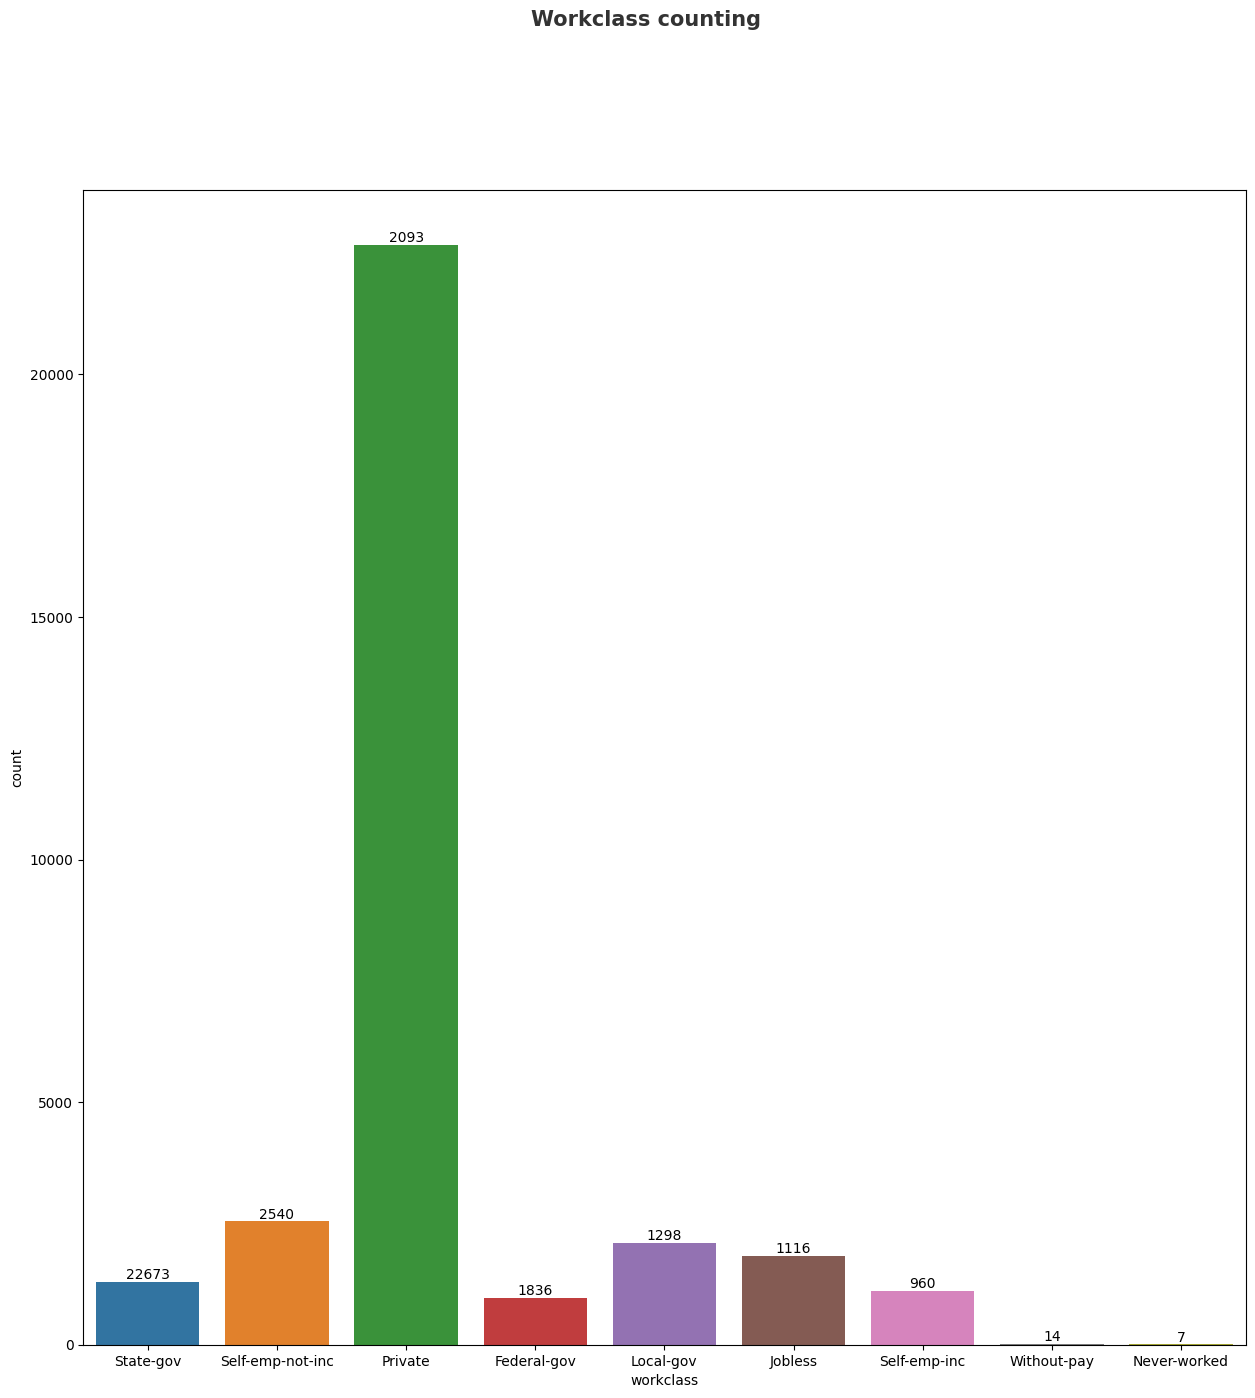

In [224]:
#number of people with workclass ratio
# number of people working in different workclass with jobless numbers also 
plt.figure(figsize=(15, 15))
plt.suptitle('Workclass counting', fontsize=15, fontweight='bold', alpha=0.8, y=1.)
gr = sns.countplot(x = df['workclass'])
abs_values = df['workclass'].value_counts(ascending=False).values
gr.bar_label(container=gr.containers[0], labels=abs_values)

<Axes: xlabel='capital-gain', ylabel='Density'>

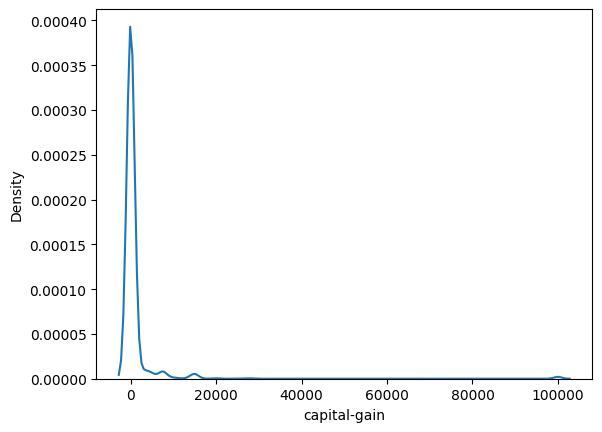

In [225]:
sns.kdeplot(df['capital-gain']) # right skewed...

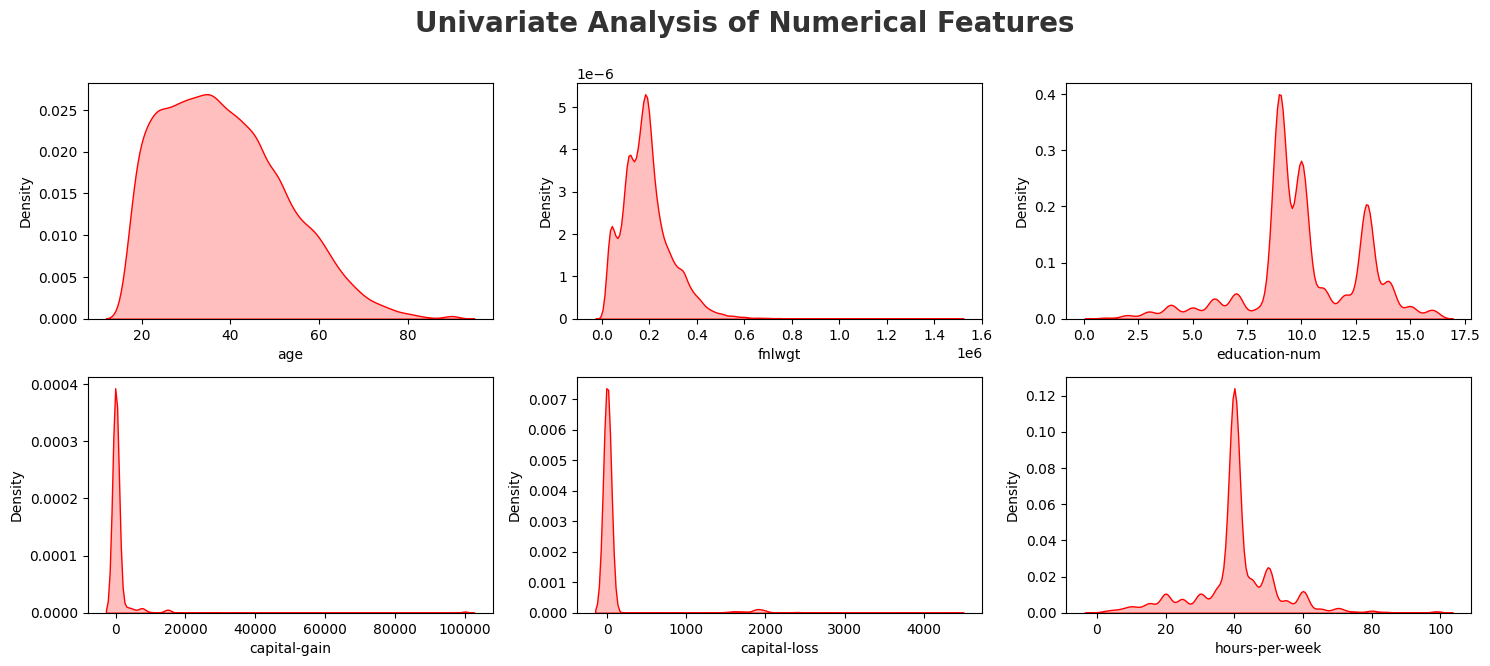

In [226]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

<Axes: ylabel='count'>

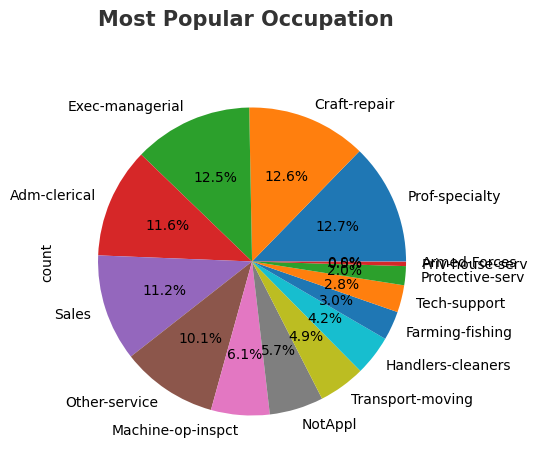

In [227]:
plt.suptitle('Most Popular Occupation', fontsize=15, fontweight='bold', alpha=0.8, y=1.)
df['occupation'].value_counts().plot.pie(figsize=(5,5),autopct='%1.1f%%') # most popular occupation...

<Axes: ylabel='count'>

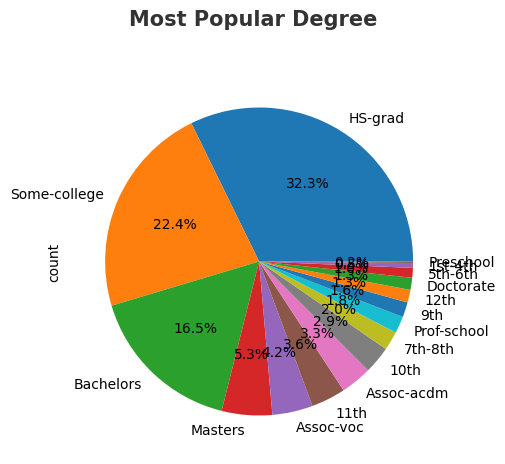

In [228]:
plt.suptitle('Most Popular Degree', fontsize=15, fontweight='bold', alpha=0.8, y=1.)
df['education'].value_counts().plot.pie(figsize=(5,5),autopct='%1.1f%%') # most education degree...

In [229]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


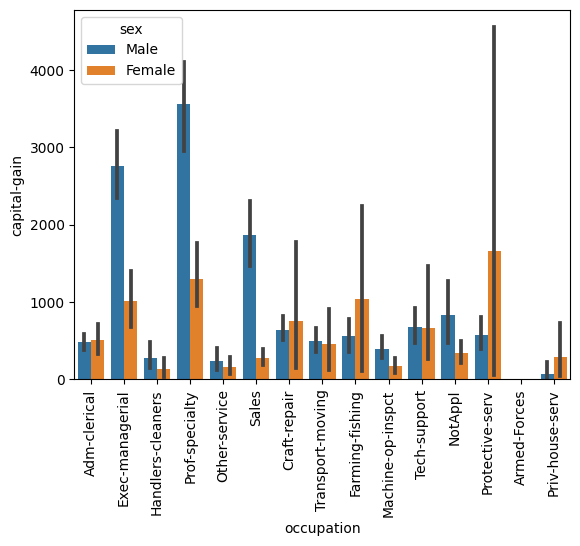

In [230]:
# relationship between occupation-wise capital-gain...
plt.Figure(figsize=(90,90))
plt.xticks(rotation=90)
sns.barplot(data=df, x="occupation", y="capital-gain", hue="sex")
# sns.barplot('occupation','capital-gain',data=df, ci = None)
plt.show()

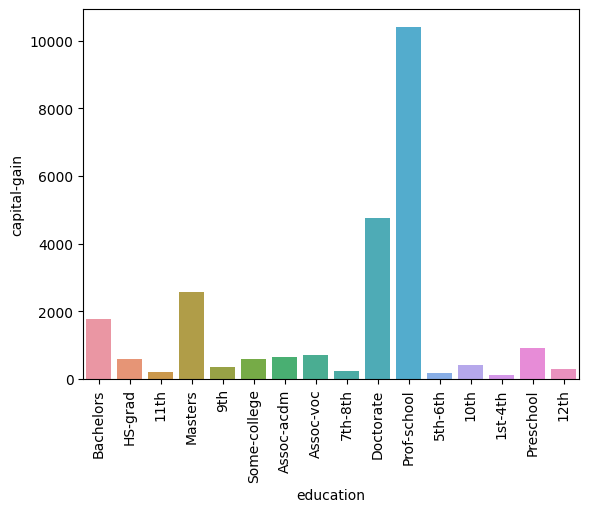

In [231]:
# relationship between education-wise and capital-gain...
plt.Figure(figsize=(90,90))
plt.xticks(rotation=90)
sns.barplot(x='education',y='capital-gain',data=df, ci=None)
plt.show()

<Axes: xlabel='capital-gain', ylabel='Density'>

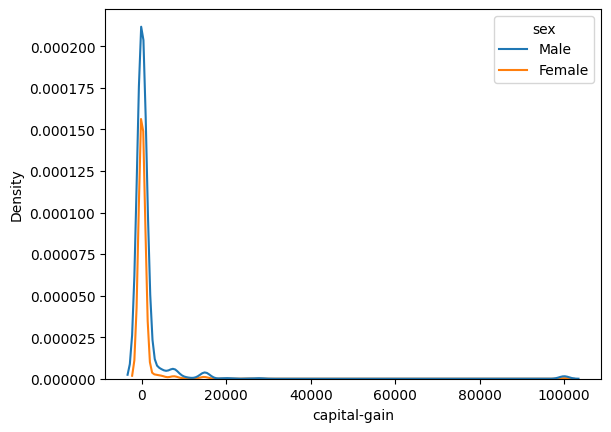

In [232]:
# comparison of capital gain between gender
sns.kdeplot(x='capital-gain', data=df, hue='sex')

<Axes: title={'center': 'Gender wise income'}, xlabel='fiftyplus,sex'>

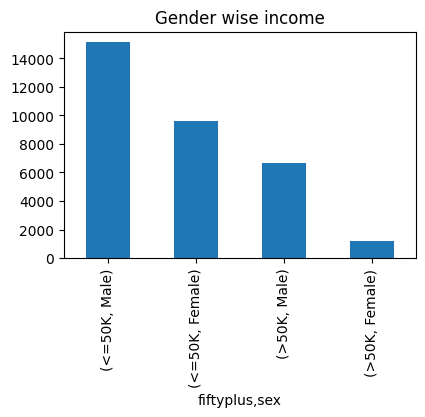

In [233]:
# Set up a grid of plots
fig = plt.figure(figsize=(10,10)) 
fig_dims = (3, 2)
# Plot accidents depending on type
plt.subplot2grid(fig_dims, (0, 0))
df.groupby('fiftyplus')['sex'].value_counts().plot(kind='bar', 
                                     title='Gender wise income')

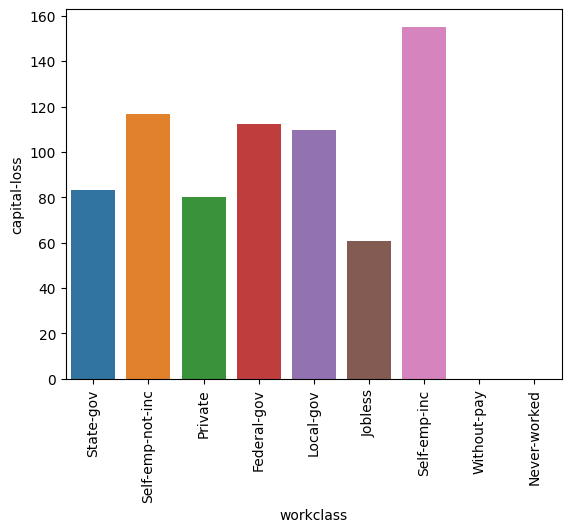

In [234]:
# relationship between workclass capital-loss...
plt.Figure(figsize=(90,90))
plt.xticks(rotation=90)
sns.barplot(x='workclass',y='capital-loss',data=df, ci = None)
plt.show()

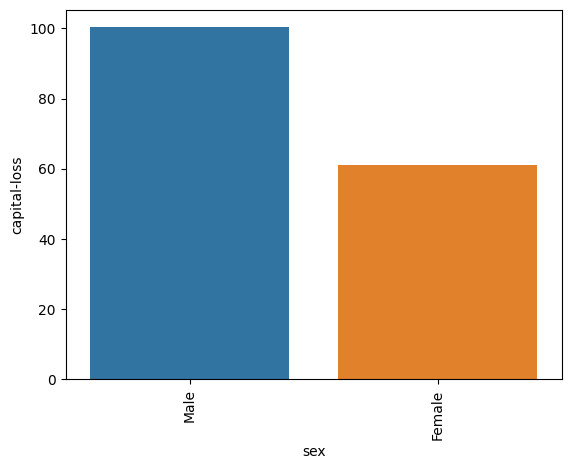

In [235]:
# relationship between workclass capital-loss...
plt.Figure(figsize=(90,90))
plt.xticks(rotation=90)
sns.barplot(x='sex',y='capital-loss',data=df, ci = None)
plt.show()

In [236]:
df['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

<Axes: title={'center': 'Race wise income'}, xlabel='race,fiftyplus'>

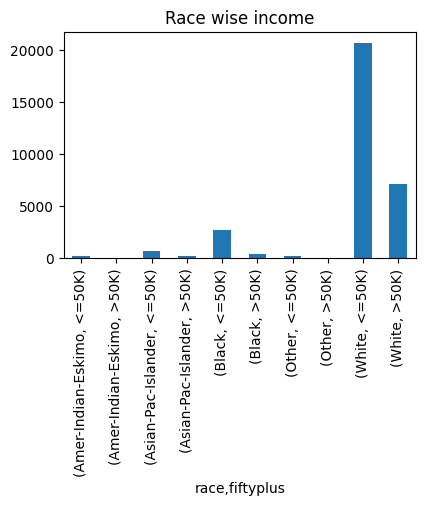

In [237]:
# does race wise income of the people..
# Set up a grid of plots
fig = plt.figure(figsize=(10,10)) 
fig_dims = (3, 2)
# Plot accidents depending on type
plt.subplot2grid(fig_dims, (0, 0))
df.groupby('race')['fiftyplus'].value_counts().plot(kind='bar', 
                                     title='Race wise income')

In [238]:
#finding total capital-loss by gender-wise- who is losing more male/female 
gr = df.groupby('sex')['capital-loss'].sum().sort_values(ascending=False).T
gr


sex
Male      2183648
Female     659052
Name: capital-loss, dtype: int64

In [239]:
#top 5 capital loss by gender group
sortedDF = df.sort_values('capital-loss', ascending=False)
sortedDF[:5]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus
8961,90,Jobless,77053,HS-grad,9,Widowed,NotAppl,Not-in-family,White,Female,0,4356,40,United-States,<=50K
30760,66,Jobless,186061,Some-college,10,Widowed,NotAppl,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14751,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
23787,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
20407,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K


In [240]:
# top 5 capital-gain by male's records..
gr = df.groupby(['sex'])
malegroup = gr.get_group('Male').sort_values('capital-gain', ascending=False)
malegroup[0:5]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus
10845,32,Private,330715,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
17782,42,Self-emp-not-inc,201908,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,50,United-States,>50K
12089,24,Jobless,151153,Some-college,10,Never-married,NotAppl,Not-in-family,Asian-Pac-Islander,Male,99999,0,50,South,>50K
31089,22,Self-emp-not-inc,214014,Some-college,10,Never-married,Sales,Own-child,Black,Male,99999,0,55,United-States,>50K
9225,46,Private,273771,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,>50K


In [241]:
# top 5 capital-gain by male's records..
gr = df.groupby(['sex'])
femalegroup = gr.get_group('Female').sort_values('capital-gain', ascending=False)
femalegroup[0:5]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus
22796,33,Private,134886,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,99999,0,30,United-States,>50K
4656,37,Local-gov,287306,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,Wife,Black,Female,99999,0,40,United-States,>50K
6000,51,Private,44000,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,99999,0,50,United-States,>50K
1826,22,Self-emp-not-inc,202920,HS-grad,9,Never-married,Prof-specialty,Unmarried,White,Female,99999,0,40,Dominican-Republic,>50K
19075,52,Self-emp-not-inc,140985,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,White,Female,99999,0,30,United-States,>50K


In [242]:
male5 = malegroup[0:5]
male5 = male5[['capital-gain','hours-per-week']]
male5


,capital-gain,hours-per-week
10845,99999,40
17782,99999,50
12089,99999,50
31089,99999,55
9225,99999,40


In [243]:
female5 = femalegroup[0:5]
female5 = female5[['capital-gain','hours-per-week']]
female5


,capital-gain,hours-per-week
22796,99999,30
4656,99999,40
6000,99999,50
1826,99999,40
19075,99999,30


In [244]:
# list of people who are from US and having morethan 50k income..
df[((df['native-country']=='United-States') & (df['fiftyplus']=='>50K'))]


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32515,71,Jobless,287372,Doctorate,16,Married-civ-spouse,NotAppl,Husband,White,Male,0,0,10,United-States,>50K
32521,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32530,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [245]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [247]:
# df['fiftyplus'] = df['fiftyplus'].map({'<=50K': False, '>50K': True}) 

df['fiftyplus'] = df['fiftyplus'].map({'<=50K': False, '>50K': True}) 

In [206]:
# ****** ending prepare for training data...

df.to_csv("income_cleaned.csv", index=False)

In [248]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,False


Observations
1. most of the peoples are below 50yrs old

2. most of the peoples are working 40 hrs per week 

3. 76%(24698 records) of peoples are having <=50 income and 24%(7839 records) having >50 k means 24% people are rich

4. 21755 are males and 10762 female records in this dataset. more male employees compared to female.

5. most of the people are doing private jobs.

6. most popular occupation is 'prof-specialty','craft-repair','exec-managerial' 

7. most popular degree is 'HS-grad' and than 'some-college' followed by 'bachelors'

8. most male belogs to 'prof-specialty' occupation gaining more capital followed by 'exec-managerial' occupation..

9. people with education 'prof-school' have more capital gain than others.

10. people belongs to workclass - 'self-emp-inc' are loosing more capital

11. Male loosing more capital compare to  female..

12. people with race-'white' having most of the people in this dataset and most white-people have <50k income.

13. sum of all capital-loss by male is higher(2183648) than female(659052)

14. working for more hours does not affect capital-gain or loss. top 5 male and female capital gainer have different working hours..

15. 7315 records belongs to US having less than 50k income 

16. highest capital-loss by top 5 are women..

17. top-5 male and female both of have same amount of capital-gain numbers..